# FINAL REPORT

# BUSSINESS CASE: Analysis of User Reviews to hotels and classify them


In present era there is evolution of technology has created, so many of things are made easy in the same when we discuss about hotel industry it also transformed a lot, people want to vaccate to some other places when they have any holidays etc. so they need to book hotels, etc so they used to book hotels before they start their journey, Most of the people in present era are beliving on user reviews or comments

   For instance we go movie based on the rating and comments for that movie, in the same way many peoples are interested to go hotels and stay over there, here also people started to belive the comforts in hotels based on reviews, ratings and commnets by other people, because of the social media also there is lot of impact due to sharing their personal experiences

From the reviews and ratings there are many advantages for the hoteliers, so they can track on negative comments and in improve there quality and they may reduce their risks

# Machine Learning Approach

As analytics has become much familer in all bussinesses so here we can also convert the above business case to  machine learning statement and can solve, we can classify the hotels based on the rating and for high rating hotels so management can do better pricing and for low rating hotels they can concentrate on how to improve there services, apart from this we can also segment the hotels based on the ratings. From ML we can also reduce hoteliers costs and make profits without reducing user comfort.

# Dataset Description

1) Reviewid - (like review number)

2) Hotelid  - (unique hotels were given id)

3) User id  - (user how stayed and reviewied in particular hotel)

4) Date     - (When the user rated the hotel)

5) reviewtext-(what comment did the user given to particluar hotel)

6) Sentiment -(wheather the hotel is good or bad or excellent)

# Data Exploration

 The give data is about hotels and their ratings and it is observed that some of the reviews are multilingual (other than english), so by using ML we can translate them to english and can knwo the user sentiment, since the sentiment analysis analyses user comments and classifying as good or bad or excellent

# 1)Importing required libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import os
import datetime as dt
from nltk.corpus import stopwords
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from googletrans import Translator
from langdetect import detect
import langid
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from textblob import Word

In [9]:
os.getcwd()

'C:\\Users\\pc\\Documents\\Python Scripts prac\\PHD ML'

In [15]:
translator = Translator()

Loading Dataset

In [16]:
train_df = pd.read_csv("Train.csv")

In [17]:
#view of first five rows
train_df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


In [18]:
train_df.shape

(6287, 6)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 6 columns):
Reviewid      6287 non-null object
Hotelid       6287 non-null object
userid        6287 non-null object
Date          6287 non-null object
reviewtext    6287 non-null object
Sentiment     6287 non-null object
dtypes: object(6)
memory usage: 294.8+ KB


# converting date to date data type

In [21]:
#from above we can notice that Date coloumn has noted as object
#so converting it to date format
train_df['Date'] =  pd.to_datetime(train_df['Date'])

In [22]:
train_df.info() #checking the date has changed or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 6 columns):
Reviewid      6287 non-null object
Hotelid       6287 non-null object
userid        6287 non-null object
Date          6287 non-null datetime64[ns]
reviewtext    6287 non-null object
Sentiment     6287 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 294.8+ KB


In [23]:
#view of first 5 rows
train_df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad


In [24]:
#dimensions of data
print("Shape of train data", train_df.shape)

Shape of train data (6287, 6)


In [25]:
#checking type of data
type(train_df)

pandas.core.frame.DataFrame

In [26]:
#describing for target column
train_df["Sentiment"].describe()

count     6287
unique       3
top       good
freq      3213
Name: Sentiment, dtype: object

In [27]:
#view of last 5 rows of dataframe
train_df.tail(5)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
6282,Review_6283,hotel_200,hotel_10272,2004-07-31,A Very Nice Boutique Hotel Had a recent stay i...,good
6283,Review_6284,hotel_200,hotel_1120,2004-07-16,My Home in NYC I happened upon the Giraffe in ...,excellent
6284,Review_6285,hotel_200,hotel_7086,2004-07-08,Fantastic New York Hotel! My husband and I don...,excellent
6285,Review_6286,hotel_200,hotel_7909,2004-06-18,It's our new favorite hotel!! After staying at...,excellent
6286,Review_6287,hotel_200,hotel_4472,2004-05-18,Terrific Hotel in the Union Square/Grammercy P...,excellent


# checking  the values are there in targett column

In [29]:
train_good=train_df[train_df["Sentiment"] == "good"]
train_good.shape

(3213, 6)

In [30]:
train_excellent = train_df[train_df["Sentiment"] == 'excellent']
train_excellent.shape

(1971, 6)

In [31]:
train_bad = train_df[train_df["Sentiment"] == 'bad']
train_bad.shape

(1103, 6)

# Checking Null Values

In [32]:
train_df.isna().sum()

Reviewid      0
Hotelid       0
userid        0
Date          0
reviewtext    0
Sentiment     0
dtype: int64

In [33]:
#checking value_counts()
for name in train_df.columns:
    print(name,":")
    print(train_df[name].value_counts(),'\n')

Reviewid :
Review_3604    1
Review_1645    1
Review_6173    1
Review_878     1
Review_4399    1
Review_6174    1
Review_4847    1
Review_1890    1
Review_597     1
Review_2096    1
Review_2509    1
Review_4394    1
Review_5925    1
Review_1684    1
Review_671     1
Review_6211    1
Review_3332    1
Review_3580    1
Review_2026    1
Review_4741    1
Review_545     1
Review_1018    1
Review_55      1
Review_3804    1
Review_2655    1
Review_1547    1
Review_5895    1
Review_4336    1
Review_2310    1
Review_3535    1
              ..
Review_5380    1
Review_2615    1
Review_2631    1
Review_3748    1
Review_4263    1
Review_1013    1
Review_680     1
Review_294     1
Review_3405    1
Review_3723    1
Review_4262    1
Review_2303    1
Review_1654    1
Review_1468    1
Review_1176    1
Review_3985    1
Review_4384    1
Review_428     1
Review_2173    1
Review_2484    1
Review_799     1
Review_743     1
Review_3099    1
Review_2754    1
Review_5795    1
Review_2962    1
Review_2808    1
Rev

# 2)Features from date

In [34]:
#extrcting year form date
train_df["year"] = train_df["Date"].dt.year

In [35]:
train_df.head(1) #checking year is created or not

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007


In [36]:
#extracting month from date
train_df["month"] = train_df["Date"].dt.month

In [37]:
train_df.head(1)  #checking month is created or not

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11


In [38]:
#weekday
train_df["weekday"] = train_df.Date.dt.weekday

In [39]:
#Quarterly
train_df["quarterly"] = train_df["Date"].dt.quarter

# 3)DATA VISUALIZATION

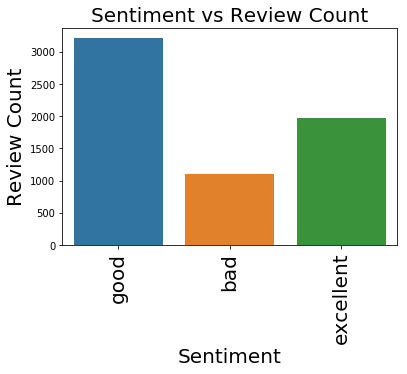

In [40]:
sns.countplot(train_df["Sentiment"])
plt.title("Sentiment vs Review Count", fontsize = 20)
plt.xlabel("Sentiment",fontsize =20)
plt.ylabel("Review Count", fontsize = 20 )
plt.xticks(fontsize=20, rotation=90)
plt.show()

from above we can say that good is most fregquent rating given by customers

FOR Year

In [42]:
#for year
df_Year = pd.crosstab(train_df['year'], train_df['Sentiment'])

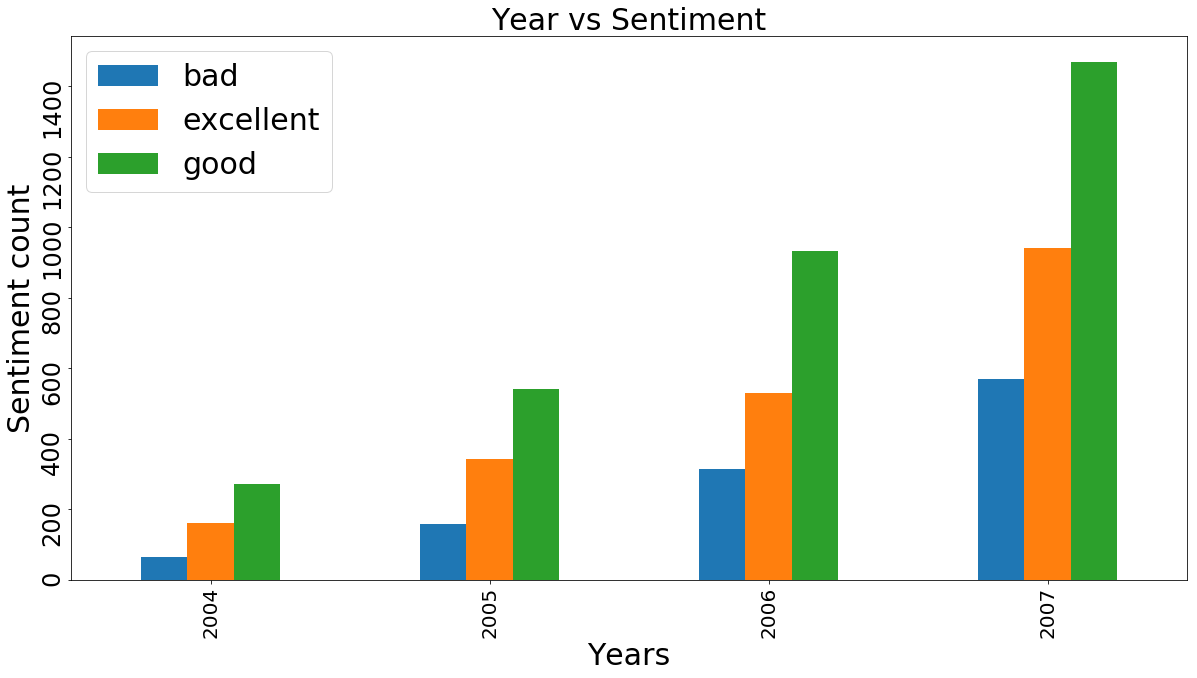

In [43]:
df_Year.plot(kind='bar', figsize=(20,10))
plt.title("Year vs Sentiment", fontsize = 30)
plt.xlabel("Years", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 30})
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

In [385]:
#from above graph we can notice that increase in ratings 

FOR Month

In [44]:
df_Month = pd.crosstab(train_df['month'], train_df['Sentiment'])

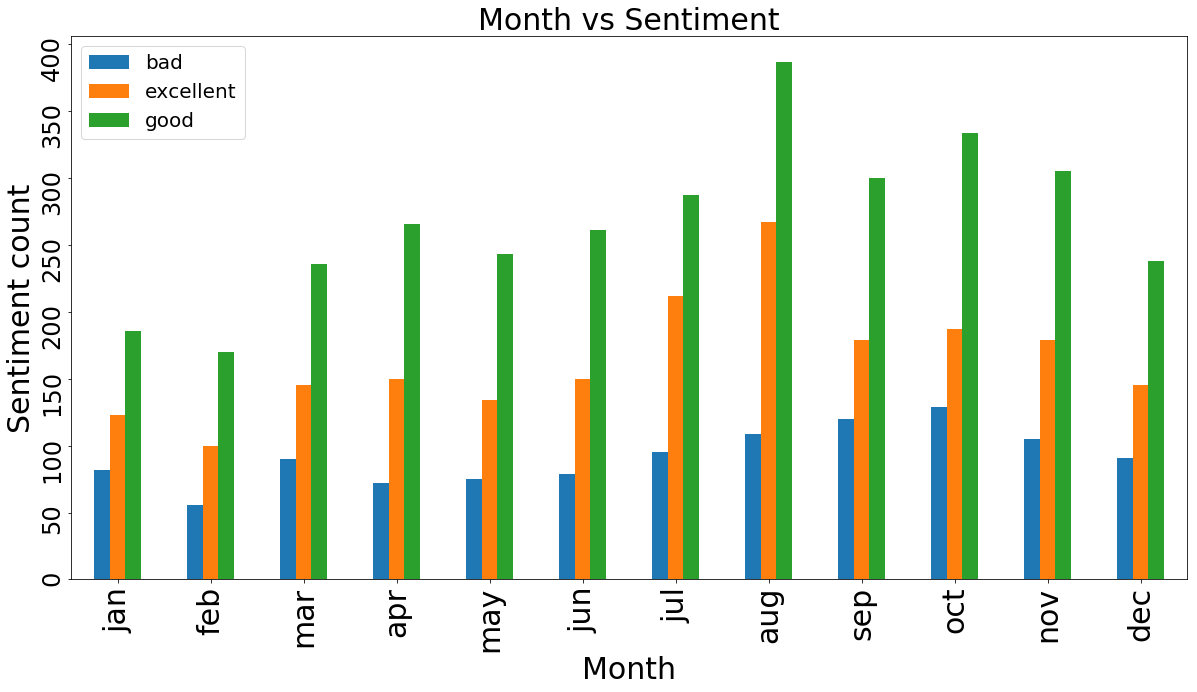

In [45]:
df_Month.plot(kind='bar', figsize=(20,10))
plt.title("Month vs Sentiment", fontsize =30 )
plt.xlabel("Month", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 20})
m = [0,1,2,3,4,5,6,7,8,9,10,11]
labels_m = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
plt.xticks(m, labels_m,fontsize=30, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

from above plot we can say that august mont has high ratings

FOR Weekday

In [46]:
train_df["weekday"] = train_df.Date.dt.weekday

In [47]:
df_Weekday = pd.crosstab(train_df['weekday'], train_df['Sentiment'])

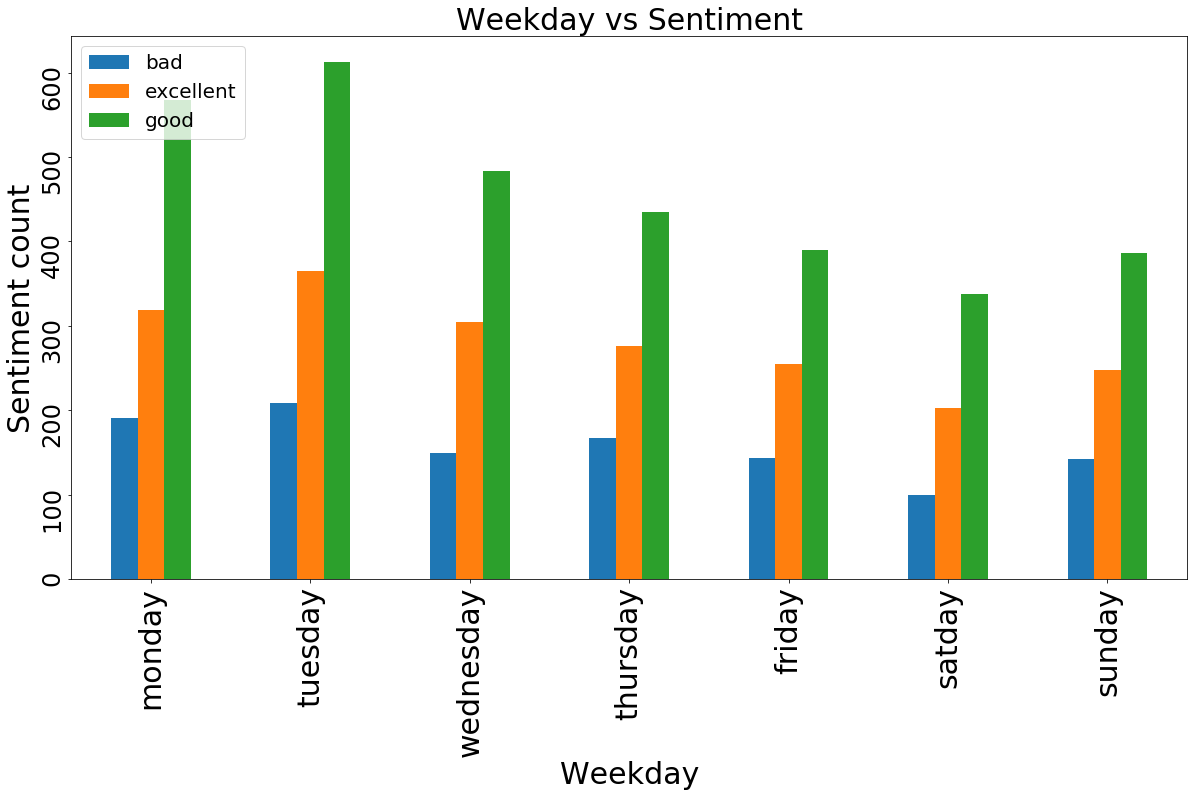

In [48]:
df_Weekday.plot(kind='bar', figsize=(20,10))
plt.title("Weekday vs Sentiment", fontsize =30 )
plt.xlabel("Weekday", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 20})
x = [0,1,2,3,4,5,6]
labels = ['monday',"tuesday",'wednesday','thursday','friday','satday','sunday']
plt.xticks(x, labels,fontsize=30, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

Quarterly

In [49]:
train_df["quarterly"] = train_df["Date"].dt.quarter

In [50]:
df_quarterly = pd.crosstab(train_df['quarterly'], train_df["Sentiment"])

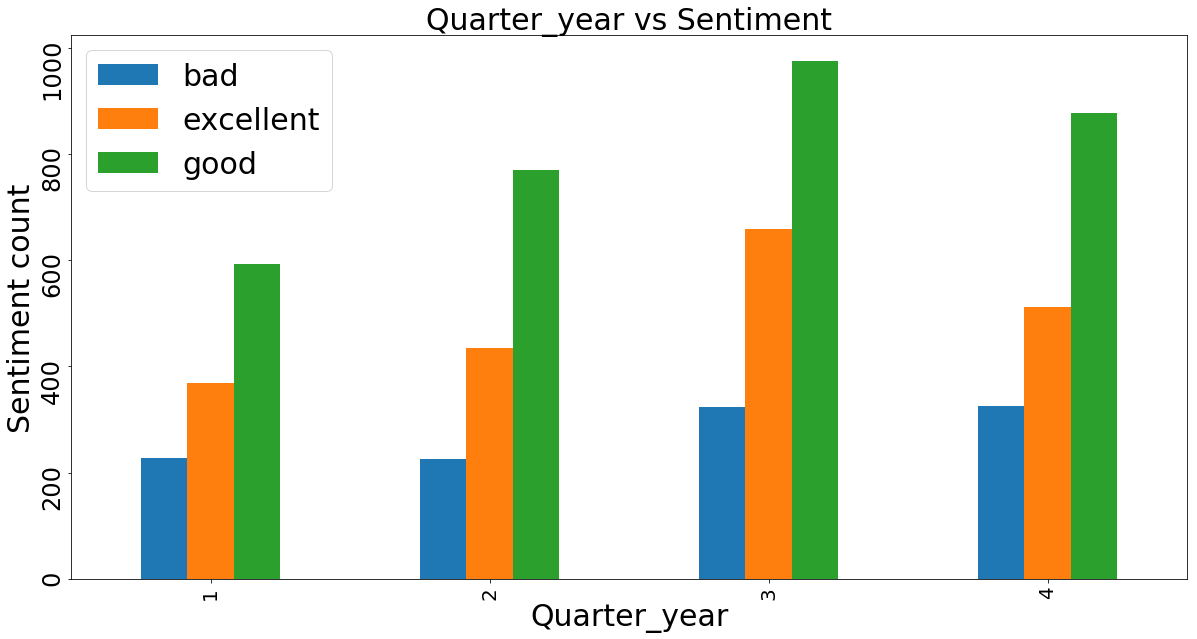

In [51]:
df_quarterly.plot(kind='bar', figsize=(20,10))
plt.title("Quarter_year vs Sentiment", fontsize = 30)
plt.xlabel("Quarter_year", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 30})
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

From above plot we can say 3rd quarter has highest ratings

# 4) TREND IN SENTIMENT

(i) Trend in sentiment with year

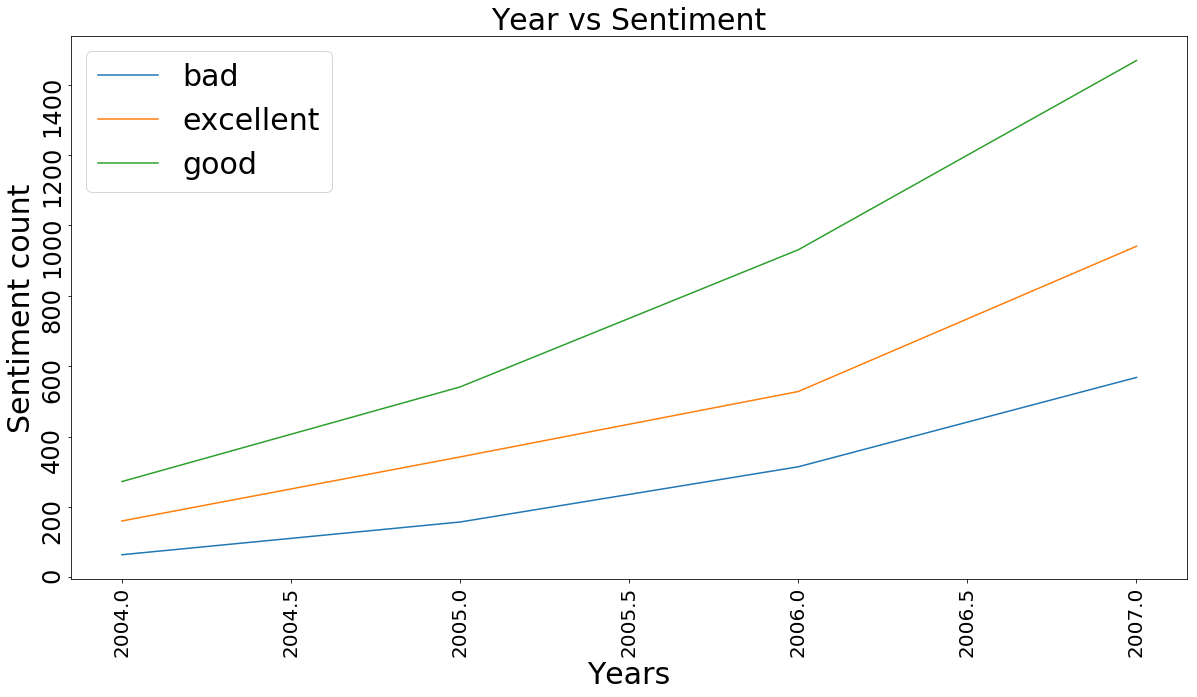

In [52]:
df_Year.plot(kind='line', figsize=(20,10))
plt.title("Year vs Sentiment", fontsize = 30)
plt.xlabel("Years", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 30})
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

from above we can say that sentiment trend is increasing from year to year

(ii) Quarter wise trend in sentiment

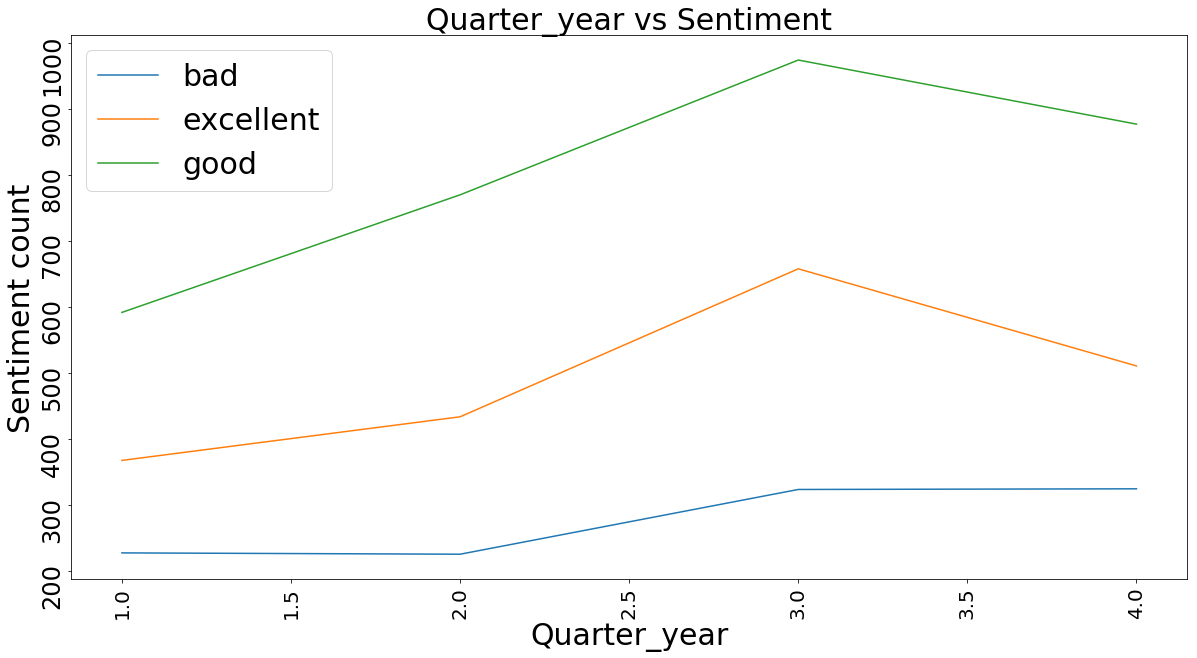

In [54]:
df_quarterly.plot(kind='line', figsize=(20,10))
plt.title("Quarter_year vs Sentiment", fontsize = 30)
plt.xlabel("Quarter_year", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 30})
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

from above plot we can say that trend increased continuously up to 3rd quarter and gradual decreased after 3rd quarter

(iii) Monthly wise trend in sentiment

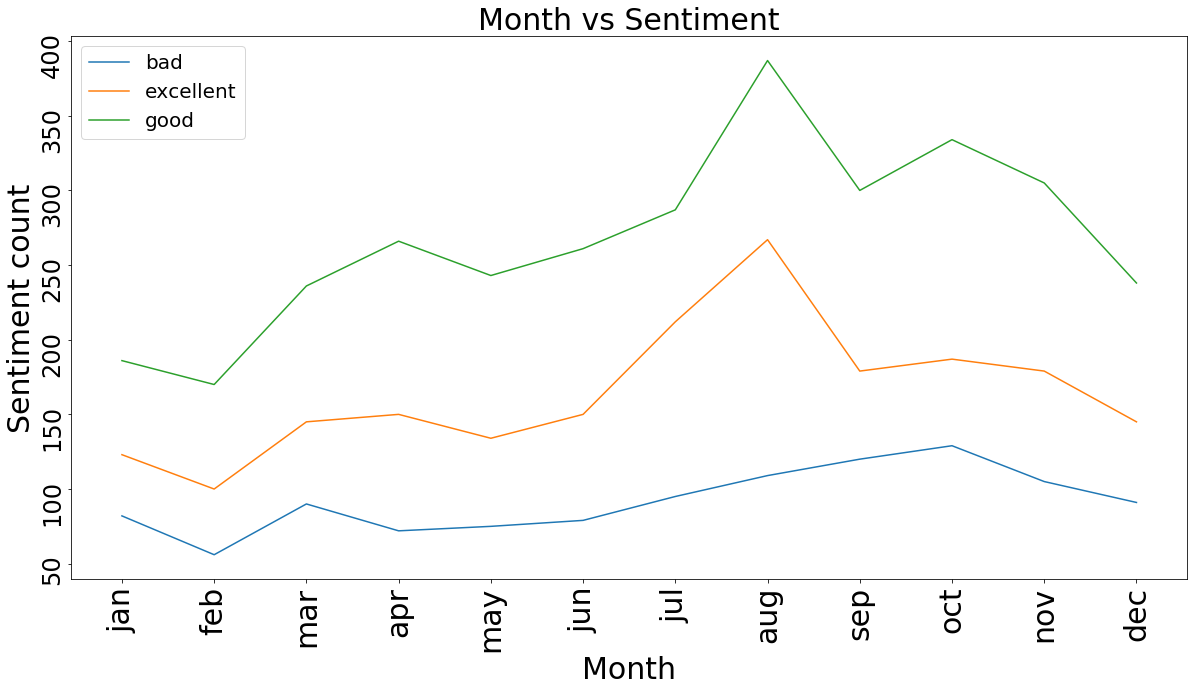

In [56]:
df_Month.plot(kind='line', figsize=(20,10))
plt.title("Month vs Sentiment", fontsize =30 )
plt.xlabel("Month", fontsize = 30)
plt.ylabel("Sentiment count",fontsize = 30)
plt.legend(loc=2, prop={'size': 20})
m = [1,2,3,4,5,6,7,8,9,10,11,12]
labels_m = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
plt.xticks(m, labels_m,fontsize=30, rotation=90)
plt.yticks(fontsize=24, rotation=90)
plt.show()

from above month we can say there lot of trend

# 5) FEATURE EXTRACTION

In [57]:
#review length
train_df["review_length"] = train_df.reviewtext.apply(lambda x: len(x))

In [58]:
train_df.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43


In [59]:
#checking how many words are there in revietext
train_df["word_count"] = train_df.reviewtext.apply(lambda x: len(str(x).split(" ")))

In [60]:
#stop words detection
stop = stopwords.words('english')

In [61]:
train_df['stop_words'] = train_df.reviewtext.apply(lambda x: len([x for x in x.split() if x in stop]))

In [62]:
#numeric values detection
train_df["numerics"] = train_df.reviewtext.apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [63]:
train_df.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43,14,2,0


In [64]:
#pd.set_option('display.max_colwidth', -1)  ## to see full text column

In [65]:
train_df[train_df["numerics"] > 1].head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,2007,8,4,3,3529,640,290,3
5,Review_6,hotel_101,hotel_3297,2007-07-13,Awesome for early AM flight Wow! what a supris...,excellent,2007,7,4,3,899,170,69,2
11,Review_12,hotel_101,hotel_8402,2007-04-28,Very Happy With My Stay This property has not ...,good,2007,4,5,2,1109,215,83,4
21,Review_22,hotel_101,hotel_6887,2006-07-17,Great hotel July 2006 - We stayed at the Court...,excellent,2006,7,0,3,1280,229,92,5
27,Review_28,hotel_102,hotel_6937,2007-11-02,Fun Hotel but there must be better places to s...,good,2007,11,4,4,2289,430,183,3


checking review length and count

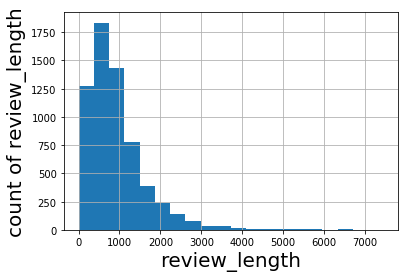

<Figure size 2880x720 with 0 Axes>

In [67]:
train_df["review_length"].hist(bins =20)
plt.xlabel("review_length", fontsize = 20)
plt.ylabel("count of review_length", fontsize = 20)
plt.figure(figsize=(40,10))
plt.show()

defining a function to clean the text

In [68]:
def clean_text(x):

    x = str(x)
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

In [69]:
train_df["cleaned_text"] = train_df.reviewtext.apply(lambda x: clean_text(x))

Generating wordcloud plot

In [70]:
overall_reviews = ' '.join(train_df["cleaned_text"].tolist())

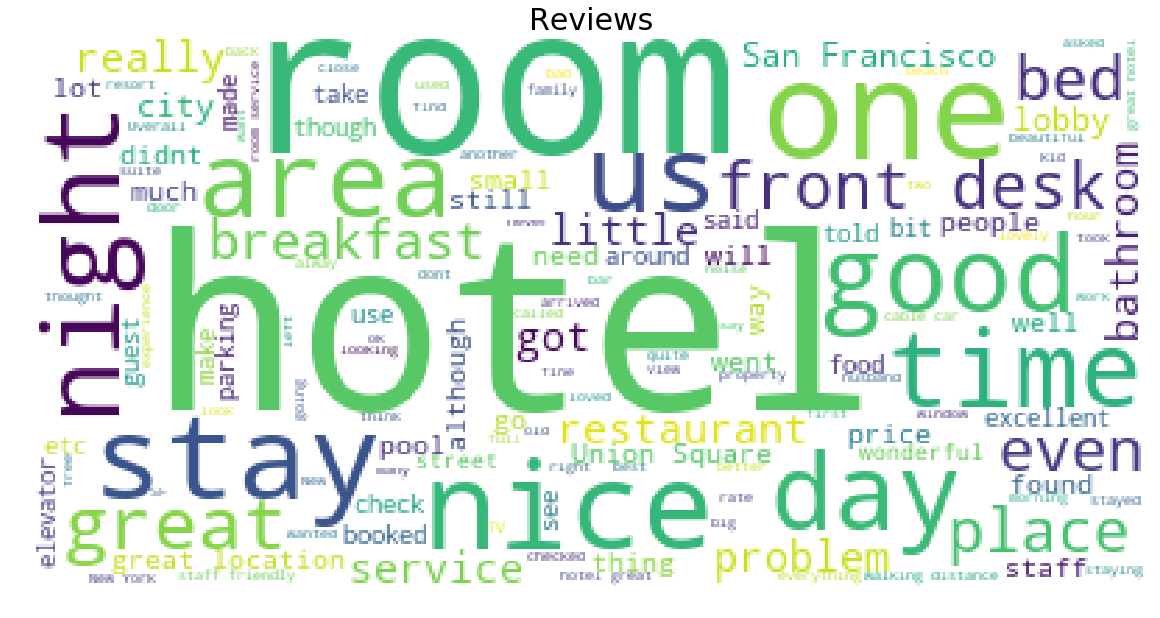

In [71]:
cloud=WordCloud(background_color="white").generate(overall_reviews)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.title("Reviews",size =30)
plt.imshow(cloud)
plt.show(cloud)

from above we can notice most frequent words

In [72]:
# what words for the excellent
train_excellent = train_df[train_df["Sentiment"] == "excellent"]

In [73]:
reviews_excelent = ' '.join(train_excellent['reviewtext'].tolist())

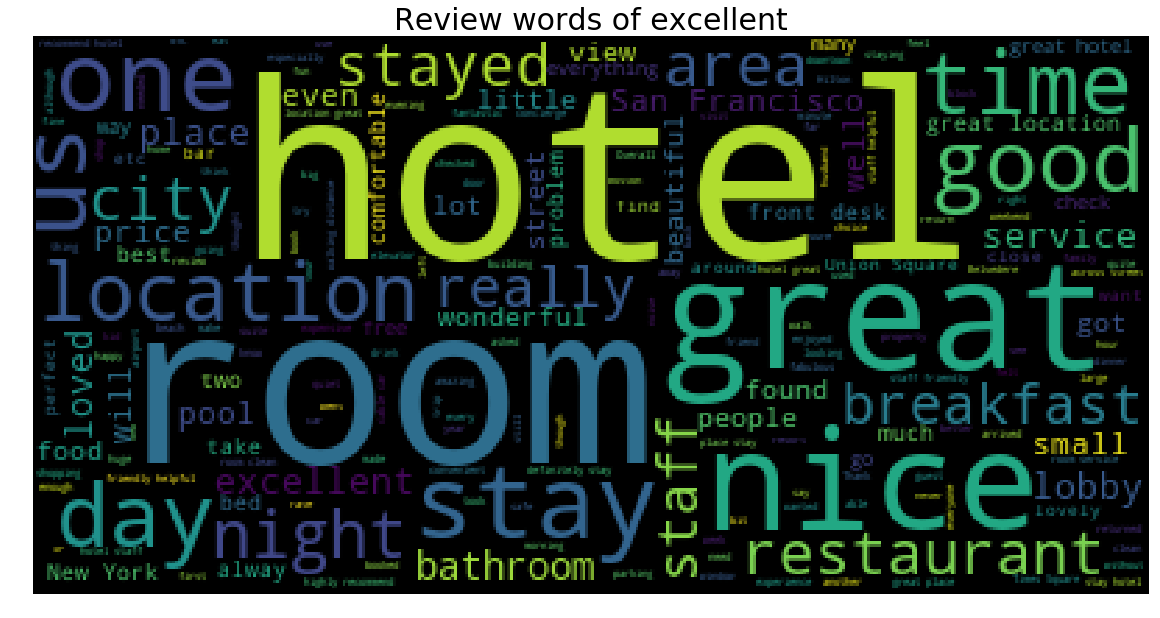

In [387]:
cloud_exc=WordCloud().generate(reviews_excelent)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.title("Review words of excellent",size =30)
plt.imshow(cloud_exc)
plt.show(cloud_exc)

In [75]:
#what words for good
train_good = train_df[train_df["Sentiment"] == "good"]
reviews_good = ' '.join(train_good['reviewtext'].tolist())

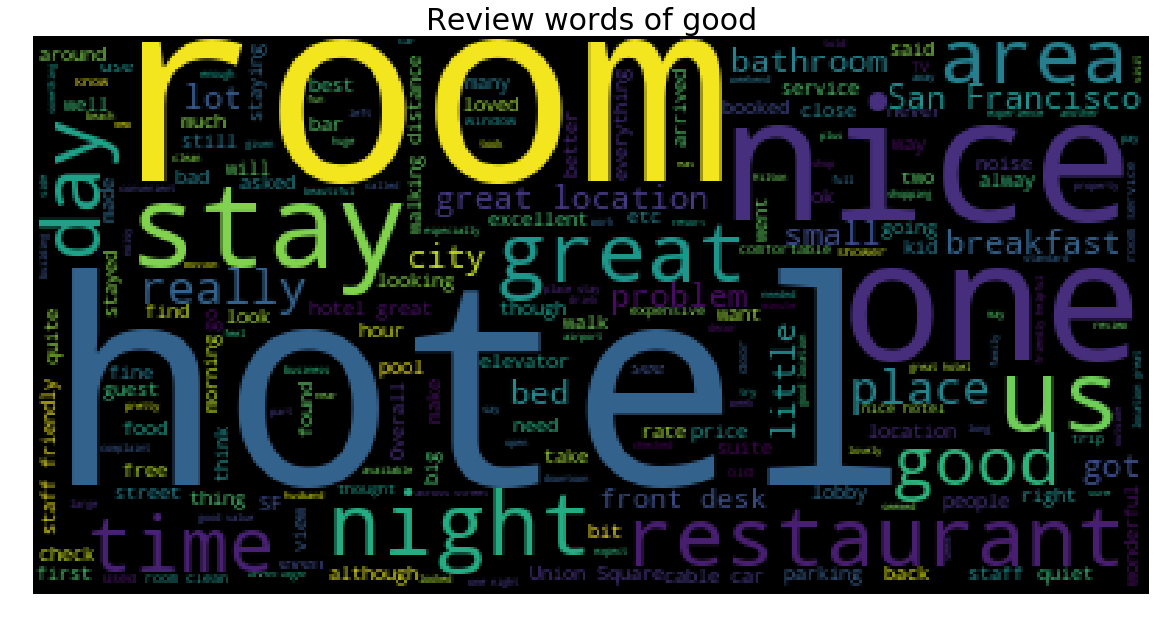

In [388]:
cloud_good=WordCloud().generate(reviews_good)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.title("Review words of good",size =30)
plt.imshow(cloud_good)
plt.show(cloud_good)

In [77]:
#what words for bad
train_bad = train_df[train_df["Sentiment"] == "bad"]
reviews_bad = ' '.join(train_bad['reviewtext'].tolist())

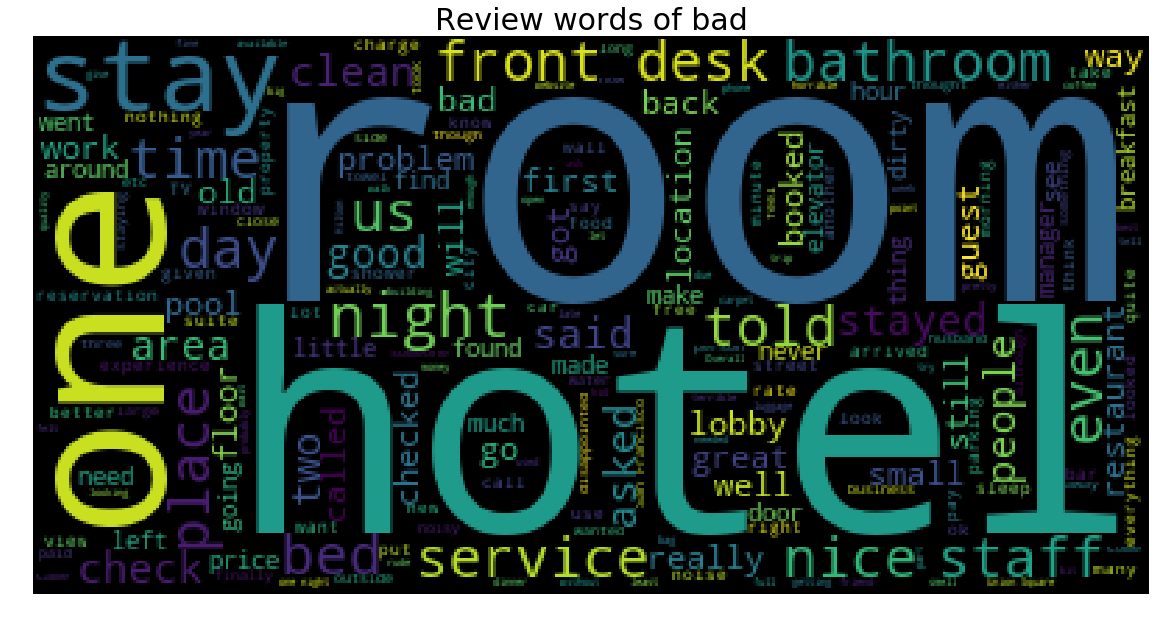

In [389]:
cloud_bad=WordCloud().generate(reviews_bad)
plt.figure(figsize=(20,20))
plt.axis("off")
plt.title("Review words of bad",size =30)
plt.imshow(cloud_bad)
plt.show(cloud_bad)

# LANGUAGE DETECTION

In [79]:
train_df["languagereview"] = train_df.cleaned_text.apply(detect)

In [80]:
train_df.languagereview.value_counts()

en    6219
fr      13
de      12
it      11
es      11
af       6
et       3
nl       3
ca       2
da       2
ro       2
fi       1
no       1
pt       1
Name: languagereview, dtype: int64

In [81]:
print("number of languages(estimated):",)
print(len(train_df["languagereview"].unique()))

number of languages(estimated):
14


# translating all the languages to english

In [82]:
#fr
fr = train_df[train_df["languagereview"] == "fr"]
fr.shape

(13, 16)

In [83]:
fr['cleaned_text'] = fr.cleaned_text.map(lambda x: translator.translate(x, src = 'fr', dest="en").text )

In [84]:
fr.head(3)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview
741,Review_742,hotel_122,hotel_3021,2007-03-20,Sofitel Los Angeles c'est si bon... ...,excellent,2007,3,1,1,61,22,0,0,Sofitel Los Angeles is so good More photos,fr
1366,Review_1367,hotel_133,hotel_4053,2006-10-02,Passable et surtout chambre beaucoup trop exig...,bad,2006,10,0,4,79,11,0,0,Fair and especially room too cramped showRevie...,fr
2548,Review_2549,hotel_146,hotel_1822,2007-05-17,H么tel tr猫s agr茅able et tr猫s bien situ茅 N...,excellent,2007,5,3,2,58,15,0,0,Hotel very nice and very well located 茅 Our room,fr


In [85]:
#it
it = train_df[train_df["languagereview"] == "it"]

In [89]:
it.shape

(11, 16)

In [88]:
it['cleaned_text'] = it.cleaned_text.map(lambda x: translator.translate(x, src = 'it', dest="en").text )

In [90]:
it.head(2)


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview
1058,Review_1059,hotel_128,hotel_6950,2006-06-23,Fantastic.,excellent,2006,6,4,2,10,1,0,0,Fantastic,it
1328,Review_1329,hotel_133,hotel_9434,2007-04-10,Crammed quarters...,good,2007,4,1,2,19,2,0,0,Crammed quarters,it


appending the languages which are translated

In [92]:
#appending the above both 2 translation
ap = fr.append(it, ignore_index=False)

In [93]:
ap.shape

(24, 16)

In [94]:
#de
de = train_df[train_df["languagereview"] == "de"]


In [96]:
de.shape

(12, 16)

In [95]:
de['cleaned_text'] = de.cleaned_text.map(lambda x: translator.translate(x, src = 'de', dest="en").text )


In [97]:
ap = ap.append(de)

In [98]:
ap.shape

(36, 16)

In [100]:
#es
es = train_df[train_df["languagereview"]=="es"]

In [102]:
es.shape

(11, 16)

In [101]:
es['cleaned_text'] = es.cleaned_text.map(lambda x: translator.translate(x, src = 'es', dest="en").text )

In [103]:
ap =ap.append(es)

In [104]:
ap.shape

(47, 16)

In [105]:
#af
af = train_df[train_df["languagereview"] == 'af']

In [106]:
af.shape

(6, 16)

In [107]:
af['cleaned_text'] = af.cleaned_text.map(lambda x: translator.translate(x, src = 'af', dest="en").text )


In [108]:
ap =ap.append(af)

In [109]:
ap.shape

(53, 16)

In [110]:
#nl
nl = train_df[train_df["languagereview"] == "nl"]

In [111]:
nl.shape

(3, 16)

In [112]:
nl['cleaned_text'] = nl.cleaned_text.map(lambda x: translator.translate(x, src = 'nl', dest="en").text )

In [113]:
ap = ap.append(nl)

In [114]:
ap.shape

(56, 16)

In [115]:
#et
et = train_df[train_df["languagereview"] == "et"]

In [116]:
et.shape

(3, 16)

In [117]:
et['cleaned_text'] = et.cleaned_text.map(lambda x: translator.translate(x, src = 'et', dest="en").text )

In [118]:
ap =ap.append(et)


In [119]:
ap.shape

(59, 16)

In [120]:
#ca
ca = train_df[train_df["languagereview"] == "ca"]

In [121]:
ca.shape

(2, 16)

In [122]:
ca['cleaned_text'] = ca.cleaned_text.map(lambda x: translator.translate(x, src = 'ca', dest="en").text )

In [123]:
ap = ap.append(ca)

In [124]:
ap.shape

(61, 16)

In [125]:
#ro
ro = train_df[train_df["languagereview"] == 'ro']

In [126]:
ro.shape

(2, 16)

In [127]:
ro['cleaned_text'] = ro.cleaned_text.map(lambda x: translator.translate(x, src = 'ro', dest="en").text )

In [128]:
ap = ap.append(ro)

In [129]:
#pt
pt = train_df[train_df["languagereview"] == "pt"]

In [130]:
pt.shape

(1, 16)

In [131]:
pt['cleaned_text'] = pt.cleaned_text.map(lambda x: translator.translate(x, src = 'pt', dest="en").text )

In [132]:
ap =ap.append(pt)

In [133]:
ap.shape

(64, 16)

In [134]:
#no
no = train_df[train_df["languagereview"]=="no"]

In [135]:
no.shape

(1, 16)

In [136]:
no['cleaned_text'] = no.cleaned_text.map(lambda x: translator.translate(x, src = 'no', dest="en").text )

In [137]:
ap = ap.append(no)

In [138]:
ap.shape

(65, 16)

In [139]:
da =train_df[train_df["languagereview"] == "da"]

In [140]:
da.shape

(2, 16)

In [141]:
da['cleaned_text'] = da.reviewtext.map(lambda x: translator.translate(x, src = 'da', dest="en").text )

In [142]:
ap =ap.append(da)

In [143]:
ap.shape

(67, 16)

In [144]:
fi =train_df[train_df["languagereview"] == "fi"]

In [146]:
fi.shape

(1, 16)

In [147]:
fi['cleaned_text'] = fi.cleaned_text.map(lambda x: translator.translate(x, src = 'fi', dest="en").text )

In [148]:
ap =ap.append(fi)

In [149]:
ap.shape

(68, 16)

In [150]:
en = train_df[train_df["languagereview"] =='en']

In [151]:
en.shape

(6219, 16)

In [152]:
train_df_1 = ap.append(en)

In [153]:
train_df_1.shape


(6287, 16)

In [154]:
train_df_1.head()


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview
741,Review_742,hotel_122,hotel_3021,2007-03-20,Sofitel Los Angeles c'est si bon... ...,excellent,2007,3,1,1,61,22,0,0,Sofitel Los Angeles is so good More photos,fr
1366,Review_1367,hotel_133,hotel_4053,2006-10-02,Passable et surtout chambre beaucoup trop exig...,bad,2006,10,0,4,79,11,0,0,Fair and especially room too cramped showRevie...,fr
2548,Review_2549,hotel_146,hotel_1822,2007-05-17,H么tel tr猫s agr茅able et tr猫s bien situ茅 N...,excellent,2007,5,3,2,58,15,0,0,Hotel very nice and very well located 茅 Our room,fr
2748,Review_2749,hotel_147,hotel_6102,2007-10-27,tr猫s bon h么tel cour int茅rieure du motel ...,good,2007,10,5,4,71,19,0,0,very good hotel interior courtyard of the mote...,fr
2750,Review_2751,hotel_147,hotel_7200,2007-02-02,Super h么tel cour int茅rieure du motel pri...,good,2007,2,4,1,68,18,0,0,Superh? Tel motel interior courtyard taken fro...,fr


from above we can notice that the indexes are not correct so we should sort those indexes

In [156]:
train_df_1.sort_index(inplace=True)

In [157]:
train_df_1.head()


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43,14,2,0,Nice Marriot View of my king bed room,en
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,2007,10,1,4,1170,226,103,0,Good hotel charges for internet access The Mar...,en
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,2007,10,4,4,668,128,61,0,Small but adequate rooms If you have an early ...,en
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,2007,8,4,3,3529,640,290,3,Better than average some noisy rooms I have st...,en
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,2007,7,2,3,1143,206,94,0,Ordinary Although it is highly rated in these ...,en


# PRE PROCESSING

In [159]:
train_df_1["cleaned_text"] = train_df_1["cleaned_text"].apply(lambda x: clean_text(x))


Dealing with stopwords

In [161]:
stop = stopwords.words('english')


In [162]:
train_df_1["cleaned_text"] = train_df_1.cleaned_text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [163]:
train_df_1['stop_words_aftr_clean'] = train_df_1.cleaned_text.apply(lambda x: len([x for x in x.split() if x in stop]))

In [164]:
train_df_1.stop_words_aftr_clean.value_counts()


0    6287
Name: stop_words_aftr_clean, dtype: int64

Convering all to lower letters

In [165]:
train_df_1["cleaned_text"] = train_df_1.cleaned_text.apply(lambda x: " ".join(x.lower() for x in x.split()))

In [166]:
train_df_1.head()


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview,stop_words_aftr_clean
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43,14,2,0,nice marriot view king bed room,en,0
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,2007,10,1,4,1170,226,103,0,good hotel charges internet access the marriot...,en,0
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,2007,10,4,4,668,128,61,0,small adequate rooms if early morning flight c...,en,0
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,2007,8,4,3,3529,640,290,3,better average noisy rooms i stayed hotel time...,en,0
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,2007,7,2,3,1143,206,94,0,ordinary although highly rated reviews pay pre...,en,0


# LEMMATIZATION

In [384]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
     return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

In [168]:
train_df_1["lemma"] = train_df_1.cleaned_text.apply(lemmatize_text)


In [169]:
train_df_1.head(10)


,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview,stop_words_aftr_clean,lemma
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43,14,2,0,nice marriot view king bed room,en,0,"[nice, marriot, view, king, bed, room]"
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,2007,10,1,4,1170,226,103,0,good hotel charges internet access the marriot...,en,0,"[good, hotel, charge, internet, access, the, m..."
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,2007,10,4,4,668,128,61,0,small adequate rooms if early morning flight c...,en,0,"[small, adequate, room, if, early, morning, fl..."
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,2007,8,4,3,3529,640,290,3,better average noisy rooms i stayed hotel time...,en,0,"[better, average, noisy, room, i, stay, hotel,..."
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,2007,7,2,3,1143,206,94,0,ordinary although highly rated reviews pay pre...,en,0,"[ordinary, although, highly, rat, review, pay,..."
5,Review_6,hotel_101,hotel_3297,2007-07-13,Awesome for early AM flight Wow! what a supris...,excellent,2007,7,4,3,899,170,69,2,awesome early am flight wow suprise we stayed ...,en,0,"[awesome, early, be, flight, wow, suprise, we,..."
6,Review_7,hotel_101,hotel_5463,2007-07-04,Good Stay Spent two nights there in Jun. The h...,good,2007,7,2,3,448,86,37,1,good stay spent two nights jun the hotel close...,en,0,"[good, stay, spend, two, nights, jun, the, hot..."
7,Review_8,hotel_101,hotel_9766,2007-06-14,Great Staff We stayed overnight the last week ...,excellent,2007,6,3,2,798,155,71,0,great staff we stayed overnight last week may ...,en,0,"[great, staff, we, stay, overnight, last, week..."
8,Review_9,hotel_101,hotel_7042,2007-06-13,fine choice for seatac The lobby is attractive...,good,2007,6,2,2,631,112,44,0,fine choice seatac the lobby attractive bit sm...,en,0,"[fine, choice, seatac, the, lobby, attractive,..."
9,Review_10,hotel_101,hotel_9805,2007-05-30,"Great value, looking for a nice hotel. not exp...",good,2007,5,2,2,333,61,25,0,great value looking nice hotel expensive nice ...,en,0,"[great, value, look, nice, hotel, expensive, n..."


In [170]:
train_df_1["lemma_join"] = train_df_1.lemma.apply(lambda x:" ".join(x))


In [171]:
train_df_1["lemma_final"] = train_df_1["lemma_join"].str.replace("[^a-zA-Z]"," ")


In [172]:
train_df_1.head(5)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview,stop_words_aftr_clean,lemma,lemma_join,lemma_final
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43,14,2,0,nice marriot view king bed room,en,0,"[nice, marriot, view, king, bed, room]",nice marriot view king bed room,nice marriot view king bed room
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,2007,10,1,4,1170,226,103,0,good hotel charges internet access the marriot...,en,0,"[good, hotel, charge, internet, access, the, m...",good hotel charge internet access the marriott...,good hotel charge internet access the marriott...
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,2007,10,4,4,668,128,61,0,small adequate rooms if early morning flight c...,en,0,"[small, adequate, room, if, early, morning, fl...",small adequate room if early morning flight ca...,small adequate room if early morning flight ca...
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,2007,8,4,3,3529,640,290,3,better average noisy rooms i stayed hotel time...,en,0,"[better, average, noisy, room, i, stay, hotel,...",better average noisy room i stay hotel time in...,better average noisy room i stay hotel time in...
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,2007,7,2,3,1143,206,94,0,ordinary although highly rated reviews pay pre...,en,0,"[ordinary, although, highly, rat, review, pay,...",ordinary although highly rat review pay premiu...,ordinary although highly rat review pay premiu...


Spltting into train and test

In [173]:
X_train, X_test, y_train, y_test = train_test_split(train_df_1["lemma_final"], train_df_1["Sentiment"], random_state=1234)

In [174]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4715,)
(4715,)
(1572,)
(1572,)


Defining CountVectorization

In [175]:
ctv = CountVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english')

Fitting train and test data in countvectors

In [176]:
ctv.fit(list(X_train) + list(X_test))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [177]:
X_train_ctv =ctv.transform(X_train)

In [178]:
X_test_ctv = ctv.transform(X_test)


Definining TFIDF

In [179]:
tfv = TfidfVectorizer(analyzer='word',stop_words="english",ngram_range=(1,1))

In [180]:
tfv.fit(list(X_train) + list(X_test))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

Fitting train and test data in TFIDF

In [181]:
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [186]:
print("*"*213)

*********************************************************************************************************************************************************************************************************************


# Building Logistc Regression

first applying on Ctv converted data

In [188]:
lr = LogisticRegression(C=1.0)

In [189]:
lr_model = lr.fit(X_train_ctv,y_train)

In [190]:
#predicting on Train_ctv
lr_ctv_tr_prediction = lr.predict(X_train_ctv)

In [191]:
#predicting on test_ctv
lr_ctv_te_prediction = lr.predict(X_test_ctv)

In [193]:
print("Accuracy on train",metrics.accuracy_score(y_train,lr_ctv_tr_prediction))

Accuracy on train 0.9696712619300106


In [195]:
print("Accuracy on test:",metrics.accuracy_score(y_test,lr_ctv_te_prediction))

Accuracy on test: 0.648854961832061


Submission Accuracy : 65

Now Applying on TFIDF converted data

In [196]:
lr_model_tfv = lr.fit(X_train_tfv,y_train)

In [197]:
lr_tfv_tr_prediction = lr.predict(X_train_tfv)

In [198]:
lr__tfv_te_prediction = lr.predict(X_test_tfv)

In [199]:
print("Accuracy on Train:",metrics.accuracy_score(y_train,lr_tfv_tr_prediction))

Accuracy on Train: 0.8288441145281018


In [200]:
print("Acuuracy on Test:",metrics.accuracy_score(y_test,lr__tfv_te_prediction))

Acuuracy on Test: 0.6736641221374046


submission accuracy : 68

In [202]:
print("*"*213)

*********************************************************************************************************************************************************************************************************************


# Building Navibase model

Defining navibase

In [203]:
nb = MultinomialNB()

Fitting navibase on train data

In [204]:
nb.fit(X_train_ctv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

prediction on train_ctv

In [205]:
nb_ctv_tr_prediction = nb.predict(X_train_ctv)

Prediction on test_ctv

In [206]:
nb_ctv_te_prediction = nb.predict(X_test_ctv)

In [208]:
print("Accuracy on train:",metrics.accuracy_score(y_train,nb_ctv_tr_prediction))


Accuracy on train: 0.8424178154825026


In [209]:
print("Accuracy on test:",metrics.accuracy_score(y_test,nb_ctv_te_prediction))

Accuracy on test: 0.6666666666666666


Submission Accuracy 67

Applying on TFIDF

In [210]:
nb_tfv = nb.fit(X_train_tfv,y_train)

In [211]:
nb_tr_tfv_prediction = nb_tfv.predict(X_train_tfv)

In [212]:
nb_te_tfv_prediction = nb_tfv.predict(X_test_tfv)


In [214]:
print("Accuracy on train:",metrics.accuracy_score(y_train,nb_tr_tfv_prediction))

Accuracy on train: 0.5306468716861081


In [215]:
print("Accuracy on Test",metrics.accuracy_score(y_test,nb_te_tfv_prediction))


Accuracy on Test 0.5248091603053435


Submission Accuracy 54

In [216]:
print("*"*213)

*********************************************************************************************************************************************************************************************************************


From above we can notice that all are overfitting so trying to reduce over fitting

# Applying SVD to reduce data

In [217]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline

Defining svd

In [219]:
svd =decomposition.TruncatedSVD(n_components=120)

Applying svd on train_ctv

In [220]:
svd.fit(X_train_ctv)

TruncatedSVD(algorithm='randomized', n_components=120, n_iter=5,
       random_state=None, tol=0.0)

transform on train and test

In [221]:
X_train_ctv_svd = svd.transform(X_train_ctv)

In [222]:
X_test_ctv_svd = svd.transform(X_test_ctv)


Scaling data defining and performing fit and transform

In [224]:
scl = preprocessing.StandardScaler()


In [225]:
scl.fit(X_train_ctv_svd)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [226]:
X_train_ctv_svd_scl = scl.transform(X_train_ctv_svd)

In [227]:
X_test_ctv_svd_scl = scl.transform(X_test_ctv_svd)


svd on TFIDF

In [228]:
svd_tfv = svd.fit(X_train_tfv)

In [229]:
X_train_tfv_svd = svd_tfv.transform(X_train_tfv)

In [230]:
X_test_tfv_svd = svd_tfv.transform(X_test_tfv)

In [234]:
scl_tfv = scl.fit(X_train_tfv_svd)

In [232]:
X_train_tfv_svd_scl = scl_tfv.transform(X_train_tfv_svd)

In [233]:
X_test_tfv_svd_scl = scl_tfv.transform(X_test_tfv_svd)

# Parameter tuning and creating pipeline

In [235]:
lr_pipeline = pipeline.Pipeline([('svd', svd),
                                 ('scl', scl),
                                 ("lr",lr_model)])

In [236]:
param_grid = {'svd__n_components' : [120, 180],
              'lr__C': [0.1, 1.0, 10], 
              'lr__penalty': ['l1', 'l2']}

In [239]:
lr_model_gs = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid,
                                 verbose=10, n_jobs=-1, iid=True, refit=True, cv=3)

In [240]:
lr_model_gs.fit(X_train_tfv,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:   32.5s remaining:   14.2s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:   37.7s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:   41.7s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   42.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('svd', TruncatedSVD(algorithm='randomized', n_components=120, n_iter=5,
       random_state=None, tol=0.0)), ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svd__n_components': [120, 180], 'lr__C': [0.1, 1.0, 10], 'lr__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [241]:
lr_model_gs.best_estimator_.get_params()

{'memory': None,
 'steps': [('svd',
   TruncatedSVD(algorithm='randomized', n_components=180, n_iter=5,
          random_state=None, tol=0.0)),
  ('scl', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lr',
   LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
             intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
             penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
             verbose=0, warm_start=False))],
 'svd': TruncatedSVD(algorithm='randomized', n_components=180, n_iter=5,
        random_state=None, tol=0.0),
 'scl': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lr': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'svd__algorithm': 'randomized',
 'svd__n_comp

In [242]:
lr_model_gs_tfv_pred = lr_model_gs.best_estimator_.predict(X_train_tfv)

In [243]:
lr_model_gs_tfv_te_pred = lr_model_gs.best_estimator_.predict(X_test_tfv)

In [244]:
print("Train Accuracy",metrics.accuracy_score(lr_model_gs_tfv_pred,y_train))


Train Accuracy 0.735949098621421


In [245]:
print("Test Accuracy",metrics.accuracy_score(lr_model_gs_tfv_te_pred,y_test))


Test Accuracy 0.6851145038167938


On submission Accuracy 68

# NOW READING TEST DATA

In [246]:
test_df = pd.read_csv("Test.csv")

In [390]:
#dimensions of data
test_df.shape

(3468, 10)

In [248]:
#view of top 5 rowws of data
test_df.head()


,Reviewid,Hotelid,userid,Date,reviewtext
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo..."


extracting features what performed on train

In [249]:
test_df["numerics"] = test_df.reviewtext.apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [250]:
test_df["review_length"] = test_df.reviewtext.apply(lambda x: len(x))

In [251]:
test_df["word_count"] = test_df.reviewtext.apply(lambda x: len(str(x).split(" ")))

In [252]:
test_df["cleaned_text"] = test_df["reviewtext"].apply(lambda x: clean_text(x))

In [253]:
test_df.head()

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...,2,642,119,Just An Average stay This was just an average ...
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...,0,345,57,go elsewhere The place is hugely overpriced an...
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...,4,2256,450,I Wont Go Back I stayed at the hotel 111408 fo...
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...,1,658,117,Good weekend stay My wife and I stay here quit...
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo...",0,680,125,Great airport stay Lovely indoor pool area loo...


# Language detection on train data

In [254]:
test_df["languagereview"] = test_df.cleaned_text.apply(detect)

In [256]:
test_df.languagereview.value_counts()

en    3378
fr      27
it      22
de      13
es      13
af       7
nl       3
da       1
no       1
et       1
ca       1
ru       1
Name: languagereview, dtype: int64

In [257]:
print("number of languages(estimated):",)
print(len(test_df["languagereview"].unique()))

number of languages(estimated):
12


In [258]:
#fr
fr_t = test_df[test_df["languagereview"] == "fr"]
fr_t.shape

(27, 10)

In [259]:
fr_t['cleaned_text'] = fr_t.cleaned_text.map(lambda x: translator.translate(x, src = 'fr', dest="en").text )

In [260]:
fr_t.shape

(27, 10)

In [262]:
fr_t.head()

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
33,Review_11034,hotel_102,hotel_3853,"Aug 30, 2008",Une tr猫s bonne adresse pour des familles sho...,0,72,11,A very good address for families showReview195...,fr
406,Review_11407,hotel_121,hotel_7574,"Jan 20, 2008",Tr猫s bon h么tel Vue ext茅rieure,0,35,11,Very good hotel Exterior view,fr
601,Review_11602,hotel_126,hotel_9018,"Aug 28, 2008",L'endroit o霉 s茅journer et o霉 se montrer 脿 Los ...,0,85,14,Where to go and where to show up in Los Angele...,fr
674,Review_11675,hotel_127,hotel_8447,"Nov 1, 2008",Palace 脿 l'ancienne piscine,0,33,10,Palace 脿 old swimming pool,fr
746,Review_11747,hotel_129,hotel_3854,"Jan 31, 2008",Quelle d茅ception !! la piscine,0,36,11,What a swimming pool,fr


In [261]:
#it
it_t = test_df[test_df["languagereview"] == "it"]

In [263]:
it_t.shape

(22, 10)

In [264]:
it_t['cleaned_text'] = it_t.cleaned_text.map(lambda x: translator.translate(x, src = 'it', dest="en").text )

In [265]:
it.head(4)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview
1058,Review_1059,hotel_128,hotel_6950,2006-06-23,Fantastic.,excellent,2006,6,4,2,10,1,0,0,Fantastic,it
1328,Review_1329,hotel_133,hotel_9434,2007-04-10,Crammed quarters...,good,2007,4,1,2,19,2,0,0,Crammed quarters,it
2325,Review_2326,hotel_144,hotel_10351,2007-08-30,"Bell'hotel, personale e organizzazione pessimi...",bad,2007,8,3,3,77,9,0,0,Bellhotel staff and bad organization showRevie...,it
3247,Review_3248,hotel_153,hotel_3834,2007-06-21,"esperienza gradevole showReview(7956270, 'fu...",good,2007,6,3,2,51,6,0,0,pleasant experience showReview7956270 full,it


In [266]:
ap_t = fr_t.append(it_t, ignore_index=False)

In [267]:
ap_t.shape

(49, 10)

In [268]:
#de
de_t = test_df[test_df["languagereview"] == "de"]

In [269]:
de_t['cleaned_text'] = de_t.cleaned_text.map(lambda x: translator.translate(x, src = 'de', dest="en").text )

In [270]:
ap_t = ap_t.append(de_t)

In [271]:
ap_t.shape

(62, 10)

In [272]:
#es
es_t = test_df[test_df["languagereview"]=="es"]

In [273]:
es_t.shape

(13, 10)

In [274]:
es_t['cleaned_text'] = es_t.cleaned_text.map(lambda x: translator.translate(x, src = 'es', dest="en").text )

In [275]:
es_t.head()

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
891,Review_11892,hotel_133,hotel_7145,"Aug 10, 2008",me encanto el trato recibido showReview(1881...,0,60,9,I loved the treatment received showReview18816...,es
1156,Review_12157,hotel_139,hotel_8457,"Dec 15, 2008",Bonito hotel y muy muy bien situado showRevi...,0,67,11,Nice hotel and very very well located showRevi...,es
1160,Review_12161,hotel_139,hotel_7784,"Sep 28, 2008",Buena Estancia Habitaci贸n,0,31,9,Good Stay Room,es
1164,Review_12165,hotel_139,hotel_2095,"Aug 9, 2008",Recomendable para visitar la ciudad Nues...,0,60,13,Recommended to visit the city Our room,es
1876,Review_12877,hotel_154,hotel_4516,"Dec 8, 2008","Muy b谩sico y descuidado showReview(22548294,...",0,55,8,Very basic and sloppy showReview22548294 full,es


In [276]:
ap_t =ap_t.append(es_t)

In [278]:
ap_t.shape

(75, 10)

In [279]:
#af
af_t = test_df[test_df["languagereview"] == 'af']

In [283]:
af_t.shape

(7, 10)

In [280]:
af_t['cleaned_text'] = af_t.cleaned_text.map(lambda x: translator.translate(x, src = 'af', dest="en").text )


In [281]:
ap_t = ap_t.append(af_t)

In [282]:
ap_t.shape

(82, 10)

In [284]:
#no
no_t = test_df[test_df["languagereview"]=="no"]

In [285]:
no_t.shape

(1, 10)

In [286]:
no_t['cleaned_text'] = no_t.cleaned_text.map(lambda x: translator.translate(x, src = 'no', dest="en").text )

In [287]:
ap_t =ap_t.append(no_t)


In [288]:
ap_t.shape


(83, 10)

In [289]:
et_t = test_df[test_df["languagereview"] == "et"]

In [290]:
et_t['cleaned_text'] = et_t.cleaned_text.map(lambda x: translator.translate(x, src = 'no', dest="en").text )

In [291]:
ap_t = ap_t.append(et_t)

In [292]:
ap_t.shape


(84, 10)

In [293]:
nl_t = test_df[test_df["languagereview"] == "nl"]

In [294]:
nl_t

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
1138,Review_12139,hotel_139,hotel_3953,"Aug 24, 2008",Best hotel in San Francisco for tourists ...,0,52,14,Best hotel in San Francisco for tourists ...,nl
1178,Review_12179,hotel_141,hotel_7744,"Nov 27, 2008",I left my heart in San Fransisco Bedroom,0,46,14,I left my heart in San Fransisco Bedroom,nl
2307,Review_13308,hotel_169,hotel_10122,"Sep 28, 2008",Hotel NewPort BeachSide .... piscina est...,0,50,12,Hotel NewPort BeachSide piscina esterna,nl


In [295]:
nl_t['cleaned_text'] = nl_t.cleaned_text.map(lambda x: translator.translate(x, src = 'nl', dest="en").text )

In [296]:
ap_t = ap_t.append(nl_t)

In [297]:
ap_t.shape


(87, 10)

In [298]:
da_t = test_df[test_df["languagereview"] == "da"]

In [299]:
da_t['cleaned_text'] = da_t.cleaned_text.map(lambda x: translator.translate(x, src = 'da', dest="en").text )

In [300]:
ap_t =ap_t.append(da_t)

In [301]:
ap_t.shape

(88, 10)

In [302]:
ca_t = test_df[test_df["languagereview"] == "ca"]

In [303]:
ca_t['cleaned_text'] = ca_t.cleaned_text.map(lambda x: translator.translate(x, src = 'ca', dest="en").text )

In [304]:
ap_t =ap_t.append(ca_t)

In [305]:
ap_t.shape

(89, 10)

In [308]:
ru_t = test_df[test_df["languagereview"] == "ru"]

In [309]:
ru_t

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
1255,Review_12256,hotel_141,hotel_4471,"Oct 19, 2008",銉︺儖銈兂銈广偍銈伄杩戙亸銇с€併偙銉笺儢銉偒銉笺伀涔椼倠銇倐渚垮埄 showR...,0,70,5,銉︺儖銈兂銈广偍銈伄杩戙亸銇с€併偙銉笺儢銉偒銉笺伀涔椼倠銇倐渚垮埄 showR...,ru


In [310]:
ru_t['cleaned_text'] = ru_t.cleaned_text.map(lambda x: translator.translate(x, src = 'ru', dest="en").text )

In [312]:
ap_t = ap_t.append(ru_t)

In [313]:
ap_t.shape

(90, 10)

In [314]:
en_t = test_df[test_df["languagereview"] == "en"]

In [315]:
en_t.shape

(3378, 10)

In [316]:
test_df_1 = ap_t.append(en_t)

In [317]:
test_df_1.shape

(3468, 10)

In [392]:
# after appending all translated languages the shape is same (not changed)

In [318]:
test_df_1.head()

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
33,Review_11034,hotel_102,hotel_3853,"Aug 30, 2008",Une tr猫s bonne adresse pour des familles sho...,0,72,11,A very good address for families showReview195...,fr
406,Review_11407,hotel_121,hotel_7574,"Jan 20, 2008",Tr猫s bon h么tel Vue ext茅rieure,0,35,11,Very good hotel Exterior view,fr
601,Review_11602,hotel_126,hotel_9018,"Aug 28, 2008",L'endroit o霉 s茅journer et o霉 se montrer 脿 Los ...,0,85,14,Where to go and where to show up in Los Angele...,fr
674,Review_11675,hotel_127,hotel_8447,"Nov 1, 2008",Palace 脿 l'ancienne piscine,0,33,10,Palace 脿 old swimming pool,fr
746,Review_11747,hotel_129,hotel_3854,"Jan 31, 2008",Quelle d茅ception !! la piscine,0,36,11,What a swimming pool,fr


In [319]:
#from above the indexes are not order so sorting

In [320]:
test_df_1.sort_index(inplace=True)

In [321]:
test_df_1.shape


(3468, 10)

In [322]:
test_df_1.head()

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...,2,642,119,Just An Average stay This was just an average ...,en
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...,0,345,57,go elsewhere The place is hugely overpriced an...,en
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...,4,2256,450,I Wont Go Back I stayed at the hotel 111408 fo...,en
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...,1,658,117,Good weekend stay My wife and I stay here quit...,en
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo...",0,680,125,Great airport stay Lovely indoor pool area loo...,en


performing train preprocessing same on test data det

In [323]:
test_df_1["cleaned_text"] = test_df_1["cleaned_text"].apply(lambda x: clean_text(x))

In [324]:
test_df_1.head(5)

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...,2,642,119,Just An Average stay This was just an average ...,en
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...,0,345,57,go elsewhere The place is hugely overpriced an...,en
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...,4,2256,450,I Wont Go Back I stayed at the hotel 111408 fo...,en
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...,1,658,117,Good weekend stay My wife and I stay here quit...,en
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo...",0,680,125,Great airport stay Lovely indoor pool area loo...,en


converting all to  lower

In [325]:
test_df_1["cleaned_text"] = test_df_1.cleaned_text.apply(lambda x: " ".join(x.lower() for x in x.split()))

In [326]:
test_df_1.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...,2,642,119,just an average stay this was just an average ...,en


Dealing stopwords

In [327]:
test_df_1['stop_words'] = test_df_1.cleaned_text.apply(lambda x: len([x for x in x.split() if x in stop]))

In [328]:
test_df_1.stop_words.value_counts()

0       162
1       109
2       102
3        60
53       40
45       40
36       34
54       34
48       34
50       32
63       32
4        32
34       32
32       32
41       32
69       32
38       31
43       31
71       31
51       31
64       30
35       30
60       30
62       30
73       29
59       29
61       29
46       29
57       28
52       27
       ... 
228       1
230       1
236       1
296       1
266       1
276       1
278       1
382       1
420       1
247       1
207       1
243       1
237       1
235       1
233       1
229       1
227       1
191       1
201       1
213       1
448       1
215       1
219       1
565       1
225       1
1508      1
522       1
486       1
472       1
1047      1
Name: stop_words, Length: 304, dtype: int64

In [329]:
#removing stop words
test_df_1["cleaned_text"] = test_df_1.cleaned_text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [330]:
test_df_1['stop_words_aftr_clean'] = test_df_1.cleaned_text.apply(lambda x: len([x for x in x.split() if x in stop]))


In [332]:
#checking if any stop words are there are not
test_df_1.stop_words_aftr_clean.value_counts()

0    3468
Name: stop_words_aftr_clean, dtype: int64

Lemmmatization

In [333]:
#lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
     return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

In [334]:
test_df_1["lemma"] = test_df_1.cleaned_text.apply(lemmatize_text)

In [335]:
test_df_1.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview,stop_words,stop_words_aftr_clean,lemma
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...,2,642,119,average stay average stay nothing standing wea...,en,66,0,"[average, stay, average, stay, nothing, stand,..."


In [336]:
test_df_1["lemma_join"] = test_df_1.lemma.apply(lambda x:" ".join(x))

In [337]:
test_df_1["lemma_final"] = test_df_1["lemma_join"].str.replace("[^a-zA-Z]"," ")

In [338]:
test_df_1.head(3)

,Reviewid,Hotelid,userid,Date,reviewtext,numerics,review_length,word_count,cleaned_text,languagereview,stop_words,stop_words_aftr_clean,lemma,lemma_join,lemma_final
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...,2,642,119,average stay average stay nothing standing wea...,en,66,0,"[average, stay, average, stay, nothing, stand,...",average stay average stay nothing stand weathe...,average stay average stay nothing stand weathe...
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...,0,345,57,go elsewhere place hugely overpriced mismanage...,en,27,0,"[go, elsewhere, place, hugely, overprice, mism...",go elsewhere place hugely overprice mismanaged...,go elsewhere place hugely overprice mismanaged...
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...,4,2256,450,wont go back stayed hotel 111408 2 nights book...,en,232,0,"[wont, go, back, stay, hotel, 111408, 2, night...",wont go back stay hotel 111408 2 nights book p...,wont go back stay hotel nights book p...


Fitting ctv on test data

In [339]:
test_data_ctv = ctv.transform(test_df_1["lemma_final"])

In [341]:
test_data_ctv.shape

(3468, 26041)

In [342]:
X_train_ctv.shape

(4715, 26041)

# LR Submission

In [344]:
lr_test_ctv_prediction = lr.predict(test_data_ctv)

In [345]:
lr_test_ctv_prediction

array(['good', 'bad', 'bad', ..., 'excellent', 'good', 'excellent'],
      dtype=object)

In [346]:
lr_test_ctv_prediction = pd.DataFrame(lr_test_ctv_prediction)

In [348]:
lr_ctv = pd.concat([test_df_1["Reviewid"], lr_test_ctv_prediction], axis=1)

In [349]:
lr_ctv.columns = ["Reviewid","Sentiment"]

In [350]:
lr_ctv.head(3)

,Reviewid,Sentiment
0,Review_11001,good
1,Review_11002,bad
2,Review_11003,bad


In [351]:
lr_ctv.to_csv('C:\\Users\\pc\\Desktop\\phd submissions\\lr_ctv.csv', index=False)

Now predicting on tfidf

In [359]:
test_data_tfv = tfv.transform(test_df_1["lemma_join"])

In [361]:
lr_tfv_test_prediction = lr_model_tfv.predict(test_data_tfv)

In [362]:
lr_test_prediction_tfv = pd.DataFrame(lr_tfv_test_prediction)


In [363]:
lr_tfv = pd.concat([test_df_1["Reviewid"], lr_test_prediction_tfv], axis=1)


In [364]:
lr_tfv.columns = ["Reviewid","Sentiment"]

In [365]:
lr_tfv.head(3)


,Reviewid,Sentiment
0,Review_11001,good
1,Review_11002,bad
2,Review_11003,bad


In [366]:
lr_tfv.to_csv('C:\\Users\\pc\\Desktop\\phd submissions\\sub_lr_tsv.csv', index=False)

In [352]:
print("*"*213)

*********************************************************************************************************************************************************************************************************************


# NB Submission

In [353]:
nb_ctv_test_predictions = nb.predict(test_data_ctv)

In [354]:
nb_test_prediction = pd.DataFrame(nb_ctv_test_predictions)

In [355]:
nb_ctv = pd.concat([test_df_1["Reviewid"], nb_test_prediction], axis=1)

In [357]:
nb_ctv.head(2)

,Reviewid,0
0,Review_11001,good
1,Review_11002,good


In [358]:
nb_ctv.to_csv('C:\\Users\\pc\\Desktop\\phd submissions\\nb_ctv.csv', index=False)

# Applying SVD on Test Data

In [367]:
svd_test = decomposition.TruncatedSVD(n_components=120)

In [368]:
svd_test.fit(test_data_tfv)

TruncatedSVD(algorithm='randomized', n_components=120, n_iter=5,
       random_state=None, tol=0.0)

In [369]:
test_data_tfv_svd = svd_test.transform(test_data_tfv)

In [370]:
scl.fit(test_data_tfv_svd)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [371]:
test_data_tfv_svd_scl = scl.transform(test_data_tfv_svd)

LR_GS_Submission

In [372]:
lr_model_gs_test_pred = lr_model_gs.best_estimator_.predict(test_data_tfv)

In [373]:
lr_model_gs_test_pred = pd.DataFrame(lr_model_gs_test_pred)

In [374]:
pred_test_lr_model_gs = pd.concat([test_df_1["Reviewid"],lr_model_gs_test_pred ], axis=1)

In [375]:
pred_test_lr_model_gs.columns = ["Reviewid","Sentiment"]

In [376]:
pred_test_lr_model_gs.head(3)

,Reviewid,Sentiment
0,Review_11001,good
1,Review_11002,bad
2,Review_11003,bad


In [377]:
pred_test_lr_model_gs.to_csv('C:\\Users\\pc\\Desktop\\phd submissions\\sub_lr_gsv_tsv.csv', index=False)

In [397]:
train_good=train_df_1[train_df_1["Sentiment"] == "good"]


In [398]:
train_good.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview,stop_words_aftr_clean,lemma,lemma_join,lemma_final
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,2007,11,4,4,43,14,2,0,nice marriot view king bed room,en,0,"[nice, marriot, view, king, bed, room]",nice marriot view king bed room,nice marriot view king bed room


In [399]:
good_freq = pd.Series(' '.join(train_good['lemma_final']).split()).value_counts()[:10]

In [400]:
good_freq

i           7042
room        6927
hotel       6553
the         6218
stay        4295
great       3155
we          3004
good        2431
location    2294
nice        2168
dtype: int64

In [401]:
train_bad=train_df_1[train_df_1["Sentiment"] == "bad"]


In [402]:
bad_freq = pd.Series(' '.join(train_bad['lemma_final']).split()).value_counts()[:10]

In [403]:
 bad_freq

i        4590
room     3280
hotel    2412
the      2247
stay     1521
get      1078
we        908
would     885
one       791
go        740
dtype: int64

In [406]:
train_exc=train_df_1[train_df_1["Sentiment"] == "excellent"]


In [407]:
train_exc.head(1)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,year,month,weekday,quarterly,review_length,word_count,stop_words,numerics,cleaned_text,languagereview,stop_words_aftr_clean,lemma,lemma_join,lemma_final
5,Review_6,hotel_101,hotel_3297,2007-07-13,Awesome for early AM flight Wow! what a supris...,excellent,2007,7,4,3,899,170,69,2,awesome early am flight wow suprise we stayed ...,en,0,"[awesome, early, be, flight, wow, suprise, we,...",awesome early be flight wow suprise we stay pr...,awesome early be flight wow suprise we stay pr...


In [408]:
exc_freq = pd.Series(' '.join(train_exc['lemma_final']).split()).value_counts()[:10]

In [409]:
exc_freq

hotel       3884
i           3771
the         3707
room        3434
stay        2783
great       2418
we          2034
staff       1292
location    1195
get         1026
dtype: int64

# SUMMARY & CONCLUSION

From above i can conclude that the given problem is sentiment analysis and performed svd and regularization to give better results and Logistic regression gives me much accuracy compared with others, its text classification so i did not did any feature important and i just checked most frequent words used by the users for respective sentiments, i came to know that to get good rating hotels should concentrate more on staff since the difference between good and excellent are same but only difference is staff, if they concentrate more they may get excellent reviews  

  for bad rating hotels i can say that wheather the rooms are not so comfort and location priority is also for the bad rated hotels, 